In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [51]:
file = "students2.csv"
data = pd.read_csv(file, header=None)
# arreglo
dataset = data.values

In [ ]:
Los datos son obtenidos de una evaluación realizada a los padres sobre el desempeño de la escuela en la educación de sus hijos

In [52]:
X = dataset[:, :-1]
y = dataset[:,-1]

In [53]:
X = X.astype(str)

In [54]:
def load_dataset(filename):
    # Cargamos el Dataframe
    data = pd.read_csv(filename, header=None)
    # Generamos un arreglo
    dataset = data.values
    # Dividimos en X y y
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # Forzamos que X sea string 
    X = X.astype(str)
    return X, y

In [55]:
# Cargamos el dataset
X, y = load_dataset(file)

# Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Checamos las dimensiones
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (322, 11) (322,)
Test (159, 11) (159,)


In [56]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [57]:
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [58]:
# Preparamos los datos de entrada o características
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# Preparamos los datos de salida o target
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

Chi cuadrada

In [59]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [60]:
# Selección de características con chi-squared
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

Característica 0: 13.759175
Característica 1: 6.179169
Característica 2: 16.321973
Característica 3: 6.175128
Característica 4: 16.424302
Característica 5: 14.891000
Característica 6: 7.025316
Característica 7: 45.196838
Característica 8: 54.393849
Característica 9: 20.488221
Característica 10: 118.444868


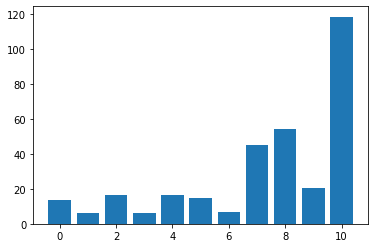

In [61]:
for i in range(len(fs.scores_)):
    print('Característica %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Mutual Information

In [62]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [63]:
# Selección de características con mutual information
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

Característica 0: 0.000000
Característica 1: 0.032811
Característica 2: 0.071936
Característica 3: 0.013399
Característica 4: 0.000000
Característica 5: 0.059308
Característica 6: 0.000000
Característica 7: 0.102391
Característica 8: 0.119702
Característica 9: 0.058216
Característica 10: 0.247152


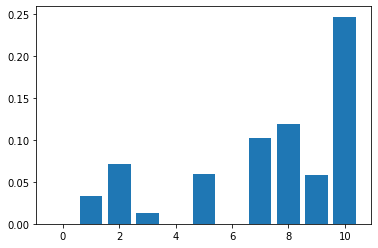

In [64]:
for i in range(len(fs.scores_)):
    print('Característica %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()